Ana Lyons
101

# Homework 6: Monte Carlo

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_Homework06.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: MC integration [similar to Ayars 6.2, Newman 10.7 ]
<i>10 pts</i>

The “volume” of a 2-sphere $x^2 + y^2 \le r^2$ (a.k.a. a “circle”) is $(1)\pi r^2$. The volume of a 3-sphere $x^2 + y^2 + z^2 \le r^2$ is $4/3 \pi r^3$. The equation for an N-sphere is $x_1^2 +x_2^2 +x_3^2 + ... + x_N^2 \le r^2$ (where $x_i$ are spatial coordinates in $N$ dimensions). We can guess, by induction from the 2-dimensional and 3-dimensional cases, that the “volume” of an N-sphere is $\alpha_N\pi r^N$. Write a function that uses Monte Carlo integration to estimate $\alpha_N$ and its uncertainty for a fixed $N$. Graph $\alpha_N$ with its uncertainty as a function of $N$ for $N=4..10$. 

Text(0,0.5,'Coefficient (A_N)')

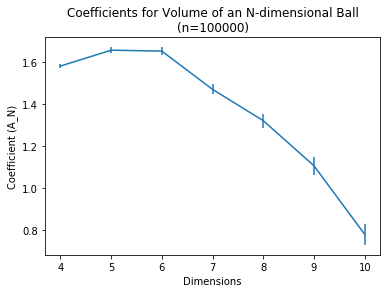

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp      
from scipy import stats
%matplotlib inline

def volume_Nsphere(N, n):
    '''Given a number of dimensions N, and a number of tries n, returns the estimated coefficient for the 
    volume function. Uses Monte Carlo integration.
    Inputs: N (int), n(int)
    Outputs: a_n (float), uncertainty (float)'''
    accept = []
    for i in range(int(n)):
        guess = np.random.rand(1, N)
        dist = np.sum(guess**2)
        if dist <= 1:
            accept.append(i)
        else:
            continue
    a_n = (2**N/np.pi)*(len(accept)/n)
    uncertainty = (a_n)/np.sqrt(len(accept))
    return a_n, uncertainty

#calculating coefficients and uncertainty for N=4...N=10
x = range(4, 11)
a_n_list = []
errors = []
for i in x:
    a_n, error = volume_Nsphere(i, 100000)
    a_n_list.append(a_n)
    errors.append(error)

#plotting results and their uncertainties
plt.errorbar(x, a_n_list, yerr=errors)
plt.title('Coefficients for Volume of an N-dimensional Ball\n(n=100000)')
plt.xlabel('Dimensions')
plt.ylabel('Coefficient (A_N)')
    
    

## Problem 2: Simulating CUORE 
<i>(20 pts)</i>

The <a href="https://cuore.lngs.infn.it/">CUORE experiment</a> at Gran Sasso, Italy, searches for Neutrinoless Double-Beta Decays ($0\nu\beta\beta$) of $^{130}$Te nucleus. Here we will produce some simulated "toy" spectra of what CUORE may see. $0\nu\beta\beta$ events deposit energy in the detector with the mean value of approximately 2530 keV. For the purpose of this simulation, we will assume that the detector response is gaussian with the standard deviation ($\sigma$) of 2 keV. In addition to signal events, there may be some "background" present; for the purpose of this simulation, we will assume that it is uniformly distributed in the region of interest. 

1. Generate an energy spectrum that CUORE might see, assuming N<sub>signal</sub>=100 signal events and N<sub>bkg</sub>=3000 background events uniformly distributed between energies of 2500 and 2600 keV. Can you see a signal peak in a histogram visually ? 

1. To measure the number of signal events, you may try to count the number of events in the window [2525..2535] keV ($\pm 2.5\sigma$) and subtract the <i>expected</i> number of background events in that window (how many?). How many signal events do you measure in your "toy" sample ? 

1. Compute significance of having observed a non-zero number of signal events, i.e. the probability that the number of signal events you measured is consistent with the zero. (<i>Hint:</i> you are testing a null hypothesis that the signal does not exist. In other words, compute the probability of the background fluctuating to the total number of events you observed in the signal window.) 

1. How does the significance depend on the size of the window ? 

Expected number of events if it was all noise: 310.000000
Actual number of events in window: 405
Signal events in toy sample: 95

P-value of seeing values over 10 keV window: 1.2891167434629921e-08
P-value of seeing values over entire histogram: 0.0001796437229648478

As window size increases, the p-value increases (while still being very small). This means that 
it is more likely that we would see background fluctuations that account for the signal if we 
look at more background events.


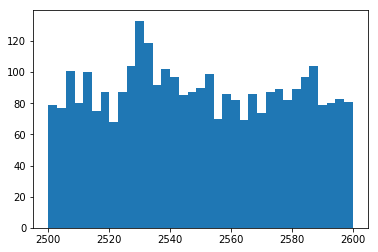

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp      
from scipy import stats
%matplotlib inline

#the signal, distributed according to a gaussian
signal = np.random.normal(loc = 2530, scale = 2.0, size = 100)
#the background, distributed uniformly
bkg = ((np.random.uniform(size = 3000))*100)+2500

overall = np.concatenate((signal, bkg))
n, bins, patches = plt.hist(overall, 35) #it's not very easy to see a signal peak visually

window_counts = []
for i in overall:
    if i >= 2525 and i <= 2535:
        window_counts.append(i)

#expected number of bkg events in a 10 keV range is 310 (if there are 3100 uniformly distributed along a 100 keV interval)
window = 10
E = 31*window
O = len(window_counts)
print('Expected number of events if it was all noise: {:f}'.format(E))
print('Actual number of events in window: {}'.format(O))
print('Signal events in toy sample: {}'.format(O-E))

#finding significance of seeing the deviation from expected value
chi_squared, pvalue = sp.stats.chisquare(n)
chi_squared1, pvalue1 = sp.stats.chisquare([O, 3100-O], [E, 3100-E])

print('\nP-value of seeing values over 10 keV window: {}'.format(pvalue1))
print('P-value of seeing values over entire histogram: {}'.format(pvalue))

#how does p-value depend on window size?
print('''\nAs window size increases, the p-value increases (while still being very small). This means that 
it is more likely that we would see background fluctuations that account for the signal if we 
look at more background events.''')





